In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# walk_dir = [[dirname, _, filenames] for dirname,1 _, filenames in os.walk('/kaggle/input')]
# imp_arr = []
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     arr = []
#     for filename in filenames:
#         arr.append(os.path.join(dirname, filename))
#     imp_arr.append(arr)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
!pip install huggingface_hub["tensorflow"]
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 20.2 MB/s eta 0:00:0000:01
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf 21.12.2 requires cupy-cuda115, which is not installed.
tfx-bsl 1.12.0 requires google-api-python-client<2,>=1.7.11, but you have google-api-python-client 2.79.0 which is incompatible.
tfx-bsl 1.12.0 requires pyarrow<7,>=6, but you have pyarrow 5.0.0 which is incompatible.
tensorflow-transform 1.12.0 requires pyarrow<7,>=6, but you have pyarrow 5.0.0 which is incompatible.
onnx 1.13.1 requires protobuf<4,>=3.20.2, but you have protobuf 3.19.6 which is incompatible.
apache-beam 2.44.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.6 which is incompatible.


In [2]:
import matplotlib.pyplot as plt

In [3]:
import pandas as pd
import os

In [4]:
imp_arr = [None,['/kaggle/input/early-detection-of-3d-printing-issues/sample_submission.csv',
 '/kaggle/input/early-detection-of-3d-printing-issues/train.csv',
 '/kaggle/input/early-detection-of-3d-printing-issues/test.csv']]
imp_arr[1]

['/kaggle/input/early-detection-of-3d-printing-issues/sample_submission.csv',
 '/kaggle/input/early-detection-of-3d-printing-issues/train.csv',
 '/kaggle/input/early-detection-of-3d-printing-issues/test.csv']

In [5]:
import random
def crop_transform(img):
    vval = 20
    hval = 40
    random_vshift = random.randint(0, vval)
    random_hshift = random.randint(0, hval)
#     return img[random_vshift:224+random_vshift, 100:324, :]
    return img[random_vshift:224+random_vshift, 100 - (hval//2) + random_hshift:324 - (hval//2) + random_hshift, :]


In [6]:
import tensorflow_addons as tfa



In [110]:
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split

# Set the paths to your CSV files
data_csv_path = imp_arr[1][1]

# Load the CSV files into pandas dataframes
data_df = pd.read_csv(data_csv_path).iloc[::100]

# Split the data into train, validation, and test sets
train_df = data_df[data_df['printer_id'].isin([101, 102])]
val_df = data_df[data_df['printer_id'].isin([103, 104])]
test_df = data_df[data_df['printer_id'].isin([22])]
# train_df, test_df = train_test_split(data_df, test_size=0.4, random_state=42)
# train_df, val_df = train_test_split(train_df, test_size=0.4, random_state=42)

# Create a function to load and preprocess images
def load_image(image_path, Label=None):
    # Load the image from the file path
    image = tf.io.read_file("/kaggle/input/early-detection-of-3d-printing-issues/images/" + image_path)
    # Decode the image and convert to float32
    
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.random_crop(image, (450, 450, 3))
    image = tf.image.random_hue(image, 0.2, seed=None)
    image = tf.image.random_brightness(image, 0.2, seed=None)
    image = tf.image.random_contrast(image, 0.9, 5.0)
#     image = tf.image.convert_image_dtype(image, tf.float32)
    # Resize the image to a consistent size
#     image = tf.image.resize(image, [224, 224])
#     vval = 20
#     hval = 40
#     random_vshift = random.randint(0, vval)
#     random_hshift = random.randint(0, hval)
#     return img[random_vshift:224+random_vshift, 100:324, :]
#     image = image[random_vshift+20:224+random_vshift+20, 100 - (hval//2) + random_hshift:324 - (hval//2) + random_hshift, :]
#     image = image[random_vshift+20:448+random_vshift+20, 100 - (hval//2) + random_hshift:548 - (hval//2) + random_hshift, :]

#     image = image[random_vshift+20:500+random_vshift+20, 100 - (hval//2) + random_hshift:660 - (hval//2) + random_hshift, :]

    #     image = tf.image.resize(image[50:300], (224, 224))
    #     image = image[:224, 100:324, :]
#     image = tf.image.central_crop(image, 0.5)
#     image = tf.image.resize(image, (256, 256))
    
#     image = image[:224, 100:324, :]
#     image = tfa.image.equalize(image)
#     image = tf.image.convert_image_dtype(image, tf.float32)
#     image = tf.image.rgb_to_grayscale(image, name=None)
    
#     image = tf.repeat(image, 3, axis=2)
    if Label is not None:
        return image, Label
    return image

# Create a tf.data.Dataset for the training set
train_dataset = tf.data.Dataset.from_tensor_slices((train_df['img_path'], train_df['has_under_extrusion']))
train_dataset = train_dataset.map(load_image)
train_dataset = train_dataset.shuffle(buffer_size=len(train_df))
train_dataset = train_dataset.batch(batch_size=32)
train_dataset = train_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

# Create a tf.data.Dataset for the validation set
val_dataset = tf.data.Dataset.from_tensor_slices((val_df['img_path'], val_df['has_under_extrusion']))
val_dataset = val_dataset.map(load_image)
val_dataset = val_dataset.batch(batch_size=32)
val_dataset = val_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

# Create a tf.data.Dataset for the test set
test_dataset = tf.data.Dataset.from_tensor_slices((test_df['img_path'], test_df['has_under_extrusion']))
test_dataset = test_dataset.map(load_image)
test_dataset = test_dataset.batch(batch_size=32)
test_dataset = test_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)


0


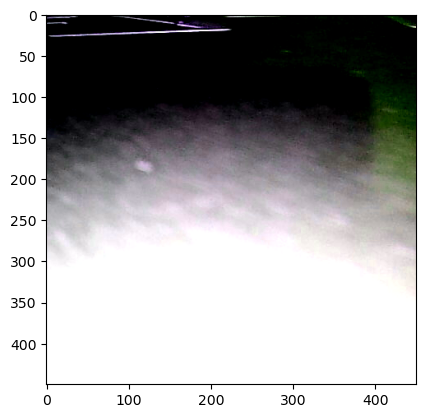

In [126]:
idx = 158
img, _ = load_image(train_df['img_path'].iloc[idx], 1)
print(train_df['has_under_extrusion'].iloc[idx])
plt.imshow(tf.cast(img, tf.uint8))
# plt.imshow(img)

In [77]:
# tf.cast(img, tf.uint8)

In [78]:

# Set the paths to your CSV files
test_data_csv_path = imp_arr[1][2]

# Load the CSV files into pandas dataframes
# data_df = pd.read_csv(data_csv_path).iloc[::100]
test_data_df = pd.read_csv(test_data_csv_path)


# Create a function to load and preprocess images
# def load_image(image_path, Label=None):
#     # Load the image from the file path
#     image = tf.io.read_file("/kaggle/input/early-detection-of-3d-printing-issues/images/" + image_path)
#     # Decode the image and convert to float32
#     image = tf.image.decode_jpeg(image, channels=3)
# #     image = tf.image.convert_image_dtype(image, tf.float32)
#     # Resize the image to a consistent size
# #     image = tf.image.resize(image, [224, 224])
# #     vval = 20
# #     hval = 40
# #     random_vshift = random.randint(0, vval)
# #     random_hshift = random.randint(0, hval)
# #     return img[random_vshift:224+random_vshift, 100:324, :]
# #     image = image[random_vshift:224+random_vshift, 100 - (hval//2) + random_hshift:324 - (hval//2) + random_hshift, :]
#     image = tf.image.resize(image[50:300], (224, 224))
#     #     image = image[:224, 100:324, :]
#     image = tfa.image.equalize(image)
#     image = tf.image.convert_image_dtype(image, tf.float32)
# #     image = tf.image.rgb_to_grayscale(image, name=None)
    
# #     image = tf.repeat(image, 3, axis=2)
#     if label:
#         return load_image
#     return image

# Create a tf.data.Dataset for the test set
final_test_dataset = tf.data.Dataset.from_tensor_slices((test_data_df['img_path']))
final_test_dataset = final_test_dataset.map(load_image)
final_test_dataset = final_test_dataset.batch(batch_size=32)
final_test_dataset = final_test_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)


In [79]:
sample_submission = pd.read_csv(imp_arr[1][0])
train_df = pd.read_csv(imp_arr[1][1])
test_df = pd.read_csv(imp_arr[1][2])

In [80]:
0 in data_df['has_under_extrusion']

True

In [81]:
data_df

,img_path,printer_id,print_id,has_under_extrusion
0,101/1678589738/1678589914.060332.jpg,101,1678589738,1
100,101/1678589738/1678589955.116972.jpg,101,1678589738,1
200,101/1678589738/1678589996.075162.jpg,101,1678589738,1
300,101/1678589738/1678590037.233739.jpg,101,1678589738,1
400,101/1678589738/1678590078.402541.jpg,101,1678589738,1
...,...,...,...,...
80600,022/1672868532/1672869247.22188.jpg,22,1672868532,1
80700,022/1672857603/1672857755.099674.jpg,22,1672857603,1
80800,022/1672857603/1672857856.006613.jpg,22,1672857603,1
80900,022/1672857603/1672857956.787276.jpg,22,1672857603,1


In [82]:
train_df

,img_path,printer_id,print_id,has_under_extrusion
0,101/1678589738/1678589914.060332.jpg,101,1678589738,1
1,101/1678589738/1678589914.462857.jpg,101,1678589738,1
2,101/1678589738/1678589914.875075.jpg,101,1678589738,1
3,101/1678589738/1678589915.284495.jpg,101,1678589738,1
4,101/1678589738/1678589915.700486.jpg,101,1678589738,1
...,...,...,...,...
81055,022/1672857603/1672858113.083624.jpg,22,1672857603,1
81056,022/1672857603/1672858114.101455.jpg,22,1672857603,1
81057,022/1672857603/1672858115.107314.jpg,22,1672857603,1
81058,022/1672857603/1672858116.11023.jpg,22,1672857603,1


In [83]:
im_base_path = "/kaggle/input/early-detection-of-3d-printing-issues/images/"

In [84]:
# d = (i for i in train_dataset)
# dd = d.__next__()[0]
# plt.imshow(dd[0])

(480, 640, 3)


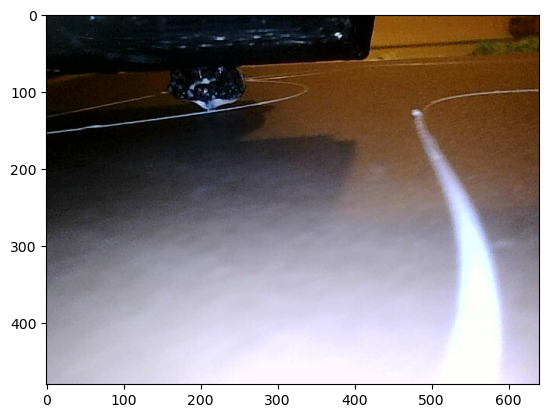

In [85]:
a = plt.imread(im_base_path + train_df['img_path'].iloc[10])
# plt.imshow(a[:224, 100:324, :])
print(a.shape)
plt.imshow(a)

In [86]:
# # plt.imshow(tfa.image.equalize(a[:224, 100:324, :].mean(axis=2)))
# _image_path = train_df['img_path'].iloc[100]
# _image = tf.io.read_file("/kaggle/input/early-detection-of-3d-printing-issues/images/" + _image_path)
# # Decode the image and convert to float32
# _image = tf.image.decode_jpeg(_image, channels=3)
# # _image = tf.image.convert_image_dtype(_image, tf.float32)

# _image = tf.image.rgb_to_grayscale(_image[:224, 100:324, :], name=None)
# _image = tfa.image.equalize(_image)
# plt.imshow(_image)
# _image = tf.repeat(_image, 3, axis=2)

# print(_image.shape)
# # plt.imshow(_image)

In [87]:
# a_float = tf.image.convert_image_dtype(a, tf.float32)
# a_bw = tf.image.rgb_to_grayscale(a_float[:224, 100:324, :], name=None)
# a_eq = tfa.image.equalize(a_bw)
# plt.imshow(a_eq)

In [88]:
# plt.imshow(a[:224, 100:324, :].mean(axis=2))

In [89]:
# plt.imshow(cv2.equalizeHist(c))

In [90]:
# a[:224, 100:324, 2].shape

In [91]:
# a[:224, 100:324, :].mean(axis=2).shape

In [92]:
# plt.hist(a[:224, 100:324, :].flatten(), bins=255)
# plt.hist(image.numpy().flatten(), bins=255)

In [93]:
import tensorflow as tf
import tensorflow_hub as hub
import torch
# model = tf.keras.Sequential([
#     hub.KerasLayer("https://kaggle.com/models/spsayakpaul/vision-transformer/frameworks/TensorFlow2/variations/vit-b8-fe/versions/1", trainable=True),
#     tf.keras.layers.Dense(2)
# ])

In [94]:
# vit_model = "https://kaggle.com/models/spsayakpaul/vision-transformer/frameworks/TensorFlow2/variations/vit-b8-fe/versions/1"
# feature_extractor_model = vit_model

In [95]:
BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 100
BUFFER_SIZE = 100
def get_batch_size(num_gpus=1):
    batch_size = BATCH_SIZE_PER_REPLICA * num_gpus
    print(f'BATCH_SIZE = {batch_size}')
    return batch_size

options = tf.data.Options()
options.experimental_distribute.auto_shard_policy = tf.data.experimental.AutoShardPolicy.OFF
custom_train_set = train_dataset.with_options(options).cache().shuffle(BUFFER_SIZE).prefetch(tf.data.AUTOTUNE)
final_test_dataset = final_test_dataset.with_options(options)

In [96]:
import tensorflow_addons as tfa
import numpy as np

In [97]:
from huggingface_hub import from_pretrained_keras

# model = from_pretrained_keras("keras-io/mobile-vit-xxs")
# prediction = model.predict(image)
# prediction = tf.squeeze(tf.round(prediction))
# print(f'The image is a {classes[(np.argmax(prediction))]}!')

# The image is a sunflower!


In [104]:
import datetime
import tensorflow.keras as keras
import tensorflow.keras.layers as layers 
from huggingface_hub import from_pretrained_keras
def build_model():
    f1_metric = tfa.metrics.F1Score(num_classes=1, threshold=0.5)
#     _feature_extractor_layer = hub.KerasLayer(
#         feature_extractor_model,
#         input_shape=(224, 224, 3),
#         trainable=False
#     )
    def activation_block(x):
        x = layers.Activation("gelu")(x)
        return layers.BatchNormalization()(x)


    def conv_stem(x, filters: int, patch_size: int):
        x = layers.Conv2D(filters, kernel_size=patch_size, strides=patch_size)(x)
        return activation_block(x)


    def conv_mixer_block(x, filters: int, kernel_size: int):
        # Depthwise convolution.
        x0 = x
        x = layers.DepthwiseConv2D(kernel_size=kernel_size, padding="same")(x)
        x = layers.Add()([activation_block(x), x0])  # Residual.

        # Pointwise convolution.
        x = layers.Conv2D(filters, kernel_size=1)(x)
        x = activation_block(x)

        return x


    def get_conv_mixer_256_8(
        image_size=256, filters=32, depth=4, kernel_size=5, patch_size=5, num_classes=2
    ):
        """ConvMixer-256/8: https://openreview.net/pdf?id=TVHS5Y4dNvM.
        The hyperparameter values are taken from the paper.
        """
        inputs = keras.Input((image_size, image_size, 3))
        x = layers.Rescaling(scale=1.0 / 255)(inputs)

        # Extract patch embeddings.
        x = conv_stem(x, filters, patch_size)

        # ConvMixer blocks.
        for _ in range(depth):
            x = conv_mixer_block(x, filters, kernel_size)

        # Classification block.
        x = layers.GlobalAvgPool2D()(x)
        outputs = layers.Dense(num_classes, activation="softmax")(x)

        return keras.Model(inputs, outputs)

#     vision_model = from_pretrained_keras("keras-io/mobile-vit-xxs")
#     vision_model = from_pretrained_keras("keras-io/conv_mixer_image_classification")
#     vision_model.trainable = False
    vision_model = get_conv_mixer_256_8()
    num_classes = 1
#     mdl = tf.keras.Sequential([
#       _feature_extractor_layer,
#       tf.keras.layers.Dense(5, activation="relu"),
#       tf.keras.layers.Dense(num_classes, activation="sigmoid")
#     ])
    mdl = tf.keras.Sequential([
#         vision_model,
      tf.keras.layers.Conv2D(4, (3, 3), activation="relu", input_shape=(450, 450, 3)),
      tf.keras.layers.MaxPooling2D((4, 4)),
#       tf.keras.layers.Conv2D(8, (3,3), activation="relu"),
#       tf.keras.layers.MaxPooling2D((4, 4)),
#       tf.keras.layers.Conv2D(2, (9, 9), activation="relu"),
#       tf.keras.layers.MaxPooling2D((3, 3)),
#       tf.keras.layers.Conv2D(2, (9, 9), activation="relu"),
#       tf.keras.layers.MaxPooling2D((2, 2)),
      tf.keras.layers.Flatten(),
#       tf.keras.layers.Dense(1024, activation="relu"),
        tf.keras.layers.Dense(4, activation="relu"),
      tf.keras.layers.Dense(1, activation="sigmoid")
    ])

    mdl.compile(
      optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
      loss=tf.keras.losses.BinaryCrossentropy(),
      metrics=['acc', f1_metric])

    log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    tensorboard_callback = tf.keras.callbacks.TensorBoard(
        log_dir=log_dir,
        histogram_freq=1) # Enable histogram computation for every epoch.
    return mdl, tensorboard_callback

In [105]:
# import tensorflow.keras.layers as layers
# def build_model():
#     f1_metric = tfa.metrics.F1Score(num_classes=1, threshold=0.5)
#     def mlp(x, hidden_units, dropout_rate):
#         for units in hidden_units:
#             x = layers.Dense(units, activation=tf.nn.gelu)(x)
#             x = layers.Dropout(dropout_rate)(x)
#         return x
#     class Patches(layers.Layer):
#         def __init__(self, patch_size):
#             super().__init__()
#             self.patch_size = patch_size

#         def call(self, images):
#             batch_size = tf.shape(images)[0]
#             patches = tf.image.extract_patches(
#                 images=images,
#                 sizes=[1, self.patch_size, self.patch_size, 1],
#                 strides=[1, self.patch_size, self.patch_size, 1],
#                 rates=[1, 1, 1, 1],
#                 padding="VALID",
#             )
#             patch_dims = patches.shape[-1]
#             patches = tf.reshape(patches, [batch_size, -1, patch_dims])
#             return patches

#     class PatchEncoder(layers.Layer):
#         def __init__(self, num_patches, projection_dim):
#             super().__init__()
#             self.num_patches = num_patches
#             self.projection = layers.Dense(units=projection_dim)
#             self.position_embedding = layers.Embedding(
#                 input_dim=num_patches, output_dim=projection_dim
#             )

#         def call(self, patch):
#             positions = tf.range(start=0, limit=self.num_patches, delta=1)
#             encoded = self.projection(patch) + self.position_embedding(positions)
#             return encoded
#     def create_vit_classifier():
#         inputs = layers.Input(shape=input_shape)
#         # Augment data.
#         augmented = data_augmentation(inputs)
# #         augmented = inputs
#         # Create patches.
#         patches = Patches(patch_size)(augmented)
#         # Encode patches.
#         encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

#         # Create multiple layers of the Transformer block.
#         for _ in range(transformer_layers):
#             # Layer normalization 1.
#             x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
#             # Create a multi-head attention layer.
#             attention_output = layers.MultiHeadAttention(
#                 num_heads=num_heads, key_dim=projection_dim, dropout=0.1
#             )(x1, x1)
#             # Skip connection 1.
#             x2 = layers.Add()([attention_output, encoded_patches])
#             # Layer normalization 2.
#             x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
#             # MLP.
#             x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.1)
#             # Skip connection 2.
#             encoded_patches = layers.Add()([x3, x2])

#         # Create a [batch_size, projection_dim] tensor.
#         representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
#         representation = layers.Flatten()(representation)
#         representation = layers.Dropout(0.5)(representation)
#         # Add MLP.
#         features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0.5)
#         # Classify outputs.
#         logits = layers.Dense(num_classes)(features)
#         # Create the Keras model.
#         model = tf.keras.Model(inputs=inputs, outputs=logits)
#         return model
#     vit_classifier = create_vit_classifier()
# #     history = run_experiment(vit_classifier)
#     optimizer = tfa.optimizers.AdamW(
#         learning_rate=learning_rate, weight_decay=weight_decay
#     )

#     vit_classifier.compile(
#         optimizer=optimizer,
# #         loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
# #         metrics=[
# #             tf.keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
# #             tf.keras.metrics.SparseTopKCategoricalAccuracy(5, name="top-5-accuracy"),
# #         ],
#           loss=tf.keras.losses.BinaryCrossentropy(),
#           metrics=['acc', f1_metric])
    
#     return vit_classifier, None


In [106]:
# learning_rate = 0.01
# weight_decay = 0.0001
# batch_size = BATCH_SIZE
# num_epochs = 20
# image_size = 224  # We'll resize input images to this size
# patch_size = 6  # Size of the patches to be extract from the input images
# num_patches = (image_size // patch_size) ** 2
# projection_dim = 64
# num_heads = 4
# transformer_units = [
#     projection_dim * 2,
#     projection_dim,
# ]  # Size of the transformer layers
# transformer_layers = 3
# mlp_head_units = [128,]  # Size of the dense layers of the final classifier
# input_shape = (448, 448, 3)
# num_classes = 1
# data_augmentation = tf.keras.Sequential(
#     [
# #         layers.Normalization(),
#         layers.Resizing(image_size, image_size),
#         layers.RandomFlip("horizontal"),
#         layers.RandomRotation(factor=0.02),
#         layers.RandomZoom(
#             height_factor=0.2, width_factor=0.2
#         ),
#     ],
#     name="data_augmentation",
# )
# # # Compute the mean and the variance of the training data for normalization.
# # data_augmentation.layers[0].adapt(train_dataset)

In [107]:
# from tensorflow.keras.callbacks import Callback
# NUM_EPOCHS = 5
# multi_gpu_model, tensorboard_callback = build_model()
# import resource
# multi_gpu_model.summary()
# history = multi_gpu_model.fit(train_dataset,
#                     validation_data=val_dataset,
#                     epochs=NUM_EPOCHS,
# #                     callbacks=[tensorboard_callback, MemoryCallback()],
#                              )


In [108]:
strategy = tf.distribute.MirroredStrategy()
print('Number of devices: {}'.format(strategy.num_replicas_in_sync))
NUM_EPOCHS = 8
with strategy.scope():
    multi_gpu_model, tensorboard_callback = build_model()
    
    
multi_gpu_model.summary()
history = multi_gpu_model.fit(train_dataset,
                    validation_data=val_dataset,
                    epochs=NUM_EPOCHS,
                    batch_size=BATCH_SIZE
#                     callbacks=tensorboard_callback,
                             )

Number of devices: 2
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 448, 448, 4)       112       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 112, 112, 4)      0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 50176)             0         
                                                                 
 dense_10 (Dense)            (None, 4)                 200708    
                                                                 
 dense_11 (Dense)            (None, 1)                 5         
                                                                 
Total params: 200,825
Trainable params: 200,825
Non-trainable params: 0
___________________________

In [109]:
test_history = multi_gpu_model.evaluate(test_dataset)

3/3 [==============================] - 2s 442ms/step - loss: 0.6966 - acc: 0.4133 - f1_score: 0.5849


In [ ]:
# !rm -r /root/.cache/huggingface/hub/

In [ ]:
multi_gpu_model, _ = build_model()
multi_gpu_model.summary()
history = multi_gpu_model.fit(train_dataset,
                    validation_data=val_dataset,
                    epochs=NUM_EPOCHS,
                    batch_size=BATCH_SIZE
#                     callbacks=tensorboard_callback,
                             )

In [ ]:
# strategy = tf.distribute.MirroredStrategy()
# print('Number of devices: {}'.format(strategy.num_replicas_in_sync))
# NUM_EPOCHS = 10
# with strategy.scope():
#     multi_gpu_model, tensorboard_callback = build_model()
    
    
# multi_gpu_model.summary()
# history = multi_gpu_model.fit(train_dataset,
#                     validation_data=val_dataset,
#                     epochs=NUM_EPOCHS,
# #                     callbacks=[tensorboard_callback, MemoryCallback()],
#                              )

In [ ]:
# test_history = multi_gpu_model.evaluate(test_dataset)

In [ ]:

# # Set the paths to your CSV files
# test_data_csv_path = imp_arr[1][2]

# # Load the CSV files into pandas dataframes
# # data_df = pd.read_csv(data_csv_path).iloc[::100]
# test_data_df = pd.read_csv(test_data_csv_path)


# # Create a function to load and preprocess images
# def test_load_image(image_path):
#     # Load the image from the file path
#     image = tf.io.read_file("/kaggle/input/early-detection-of-3d-printing-issues/images/" + image_path)
#     # Decode the image and convert to float32
#     image = tf.image.decode_jpeg(image, channels=3)
#     image = tf.image.convert_image_dtype(image, tf.float32)
#     # Resize the image to a consistent size
# #     image = tf.image.resize(image, [224, 224])
#     image = image[:224, 100:324, :]
#     return image

# # Create a tf.data.Dataset for the test set
# final_test_dataset = tf.data.Dataset.from_tensor_slices((test_data_df['img_path']))
# final_test_dataset = final_test_dataset.map(test_load_image)
# final_test_dataset = final_test_dataset.batch(batch_size=32)
# final_test_dataset = final_test_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)


In [ ]:
print("Generating Outputs for Test Set")

In [ ]:
outputs = multi_gpu_model.predict(final_test_dataset)

In [ ]:
sample_submission

In [ ]:
my_submission_df = test_data_df[['img_path']]

In [ ]:
my_submission_df['has_under_extrusion'] = outputs.round().reshape(-1).astype(int)

In [ ]:
my_submission_df

In [ ]:
my_submission_df.to_csv("./submission.csv", index=False)

In [ ]:
# NUM_EPOCHS = 10
# with strategy.scope():
#     multi_gpu_model = build_model()
    
# multi_gpu_model.summary()
# history = multi_gpu_model.fit(train_dataset,
#                     validation_data=test_dataset,
#                     epochs=NUM_EPOCHS,
#                     callbacks=tensorboard_callback,
#                              )